In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practice
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
music_df = pd.read_csv('music_df.csv')

In [3]:
music_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.796,0.865,9,-6.760,0,0.0801,0.17900,0.011400,0.0852,0.768,130.012,audio_features,5qQLBOEAelSN7JWqX3RIIv,spotify:track:5qQLBOEAelSN7JWqX3RIIv,https://api.spotify.com/v1/tracks/5qQLBOEAelSN...,https://api.spotify.com/v1/audio-analysis/5qQL...,136988,4
1,0.776,0.714,1,-5.705,1,0.3350,0.02830,0.000000,0.2270,0.433,161.015,audio_features,4rSmXn2TIKt6iBeBDM4uOs,spotify:track:4rSmXn2TIKt6iBeBDM4uOs,https://api.spotify.com/v1/tracks/4rSmXn2TIKt6...,https://api.spotify.com/v1/audio-analysis/4rSm...,149444,4
2,0.960,0.670,3,-7.035,0,0.3150,0.05980,0.000016,0.1710,0.800,133.966,audio_features,6R5iuYqG0HsnC41RT3lzqX,spotify:track:6R5iuYqG0HsnC41RT3lzqX,https://api.spotify.com/v1/tracks/6R5iuYqG0Hsn...,https://api.spotify.com/v1/audio-analysis/6R5i...,174232,4
3,0.752,0.571,2,-6.422,1,0.0510,0.07230,0.529000,0.3140,0.492,169.155,audio_features,6FGPpwHlUBnl0TLGKyN4Nl,spotify:track:6FGPpwHlUBnl0TLGKyN4Nl,https://api.spotify.com/v1/tracks/6FGPpwHlUBnl...,https://api.spotify.com/v1/audio-analysis/6FGP...,83672,4
4,0.774,0.700,1,-7.334,1,0.2660,0.16300,0.000032,0.1690,0.624,81.990,audio_features,3ilgxZl5g7MOQCUiky3VOG,spotify:track:3ilgxZl5g7MOQCUiky3VOG,https://api.spotify.com/v1/tracks/3ilgxZl5g7MO...,https://api.spotify.com/v1/audio-analysis/3ilg...,147587,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,0.720,0.932,10,-4.204,1,0.0414,0.09760,0.000001,0.0673,0.918,130.928,audio_features,4cSSAsYt4afPzyaBdO0WVs,spotify:track:4cSSAsYt4afPzyaBdO0WVs,https://api.spotify.com/v1/tracks/4cSSAsYt4afP...,https://api.spotify.com/v1/audio-analysis/4cSS...,192627,4
908,0.667,0.821,11,-5.565,1,0.0398,0.09410,0.000003,0.0579,0.638,121.027,audio_features,3fGkWWpjU3xghZbKa2rQUW,spotify:track:3fGkWWpjU3xghZbKa2rQUW,https://api.spotify.com/v1/tracks/3fGkWWpjU3xg...,https://api.spotify.com/v1/audio-analysis/3fGk...,224992,4
909,0.704,0.934,7,-4.528,1,0.0728,0.02850,0.000000,0.2880,0.494,121.014,audio_features,1JlczCvmw3K2MizmtDvfp3,spotify:track:1JlczCvmw3K2MizmtDvfp3,https://api.spotify.com/v1/tracks/1JlczCvmw3K2...,https://api.spotify.com/v1/audio-analysis/1Jlc...,191053,4
910,0.716,0.695,5,-5.250,1,0.0354,0.00643,0.000015,0.1080,0.684,117.966,audio_features,0oUlljswfmHwdNpjHnn8Ii,spotify:track:0oUlljswfmHwdNpjHnn8Ii,https://api.spotify.com/v1/tracks/0oUlljswfmHw...,https://api.spotify.com/v1/audio-analysis/0oUl...,190907,4


In [4]:
music_select = music_df[['danceability','energy','loudness','tempo','valence','acousticness']]

In [5]:
music_select

,danceability,energy,loudness,tempo,valence,acousticness
0,0.796,0.865,-6.760,130.012,0.768,0.17900
1,0.776,0.714,-5.705,161.015,0.433,0.02830
2,0.960,0.670,-7.035,133.966,0.800,0.05980
3,0.752,0.571,-6.422,169.155,0.492,0.07230
4,0.774,0.700,-7.334,81.990,0.624,0.16300
...,...,...,...,...,...,...
907,0.720,0.932,-4.204,130.928,0.918,0.09760
908,0.667,0.821,-5.565,121.027,0.638,0.09410
909,0.704,0.934,-4.528,121.014,0.494,0.02850
910,0.716,0.695,-5.250,117.966,0.684,0.00643


In [6]:
X = music_select

#Scale the Dataframe

In [7]:
scaler = StandardScaler()
scaling = scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
#display(X.head())
print()
display(X_scaled_df.head())

,danceability,energy,loudness,tempo,valence,acousticness
0,1.255680,1.146398,0.456732,0.304511,1.670938,-0.724432
1,1.132024,0.634634,0.643647,1.355850,0.274319,-1.116425
2,2.269661,0.485510,0.408010,0.438594,1.804346,-1.034489
3,0.983636,0.149983,0.516615,1.631884,0.520291,-1.001974
4,1.119658,0.587185,0.355036,-1.323957,1.070600,-0.766050


In [8]:
kmeans = KMeans(n_clusters=20, random_state=1234)  #pass in two parameters
kmeans.fit(X_scaled_df)

/Users/dominik/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=20, random_state=1234)

In [9]:
labels = kmeans.labels_
labels

array([ 4,  2, 11,  2, 19, 19, 19,  2,  7, 19, 11, 19, 11, 19, 19,  2, 19,
        0,  3, 19, 19,  2,  0, 11, 11, 19, 19,  0,  2,  2, 14, 19, 19,  3,
        2, 19, 19,  2, 19,  0,  2,  3,  3, 19, 10,  2, 19,  0,  0,  2,  3,
       14, 15, 14,  2,  3, 10, 14,  0,  9, 14, 10,  3,  2, 10, 10, 10, 10,
        9, 15, 10,  3, 14, 10,  9,  0,  3,  9, 10, 10,  2,  4, 14, 10,  3,
        3,  3, 10,  3, 14, 14,  3,  0,  3, 10, 10, 14, 14, 10,  3,  3, 19,
        2, 10,  3,  2,  2, 19, 11,  2,  3,  2,  2,  3,  3, 11,  2,  2, 19,
       12,  3,  4,  2, 19,  2,  0, 19,  3,  7,  7,  0,  0,  2,  3,  2, 19,
       11,  0,  0, 10,  2,  0,  4,  2, 19,  2, 10,  3,  3,  2,  4, 19, 14,
        4,  2, 16,  0,  3,  4,  3, 13, 19,  2,  3, 12, 19,  5,  3, 11, 14,
        4, 10, 14,  4,  7,  6,  3,  0,  2, 10, 19, 19,  2,  3, 16,  0, 14,
       10,  4, 11,  7,  4,  7, 14,  4,  4, 19, 14, 18, 11,  1,  1, 13, 18,
        8,  8,  3, 19, 12, 16, 16, 18, 18,  8, 13, 13, 19,  0, 12,  5,  1,
        1,  5,  1, 16, 16

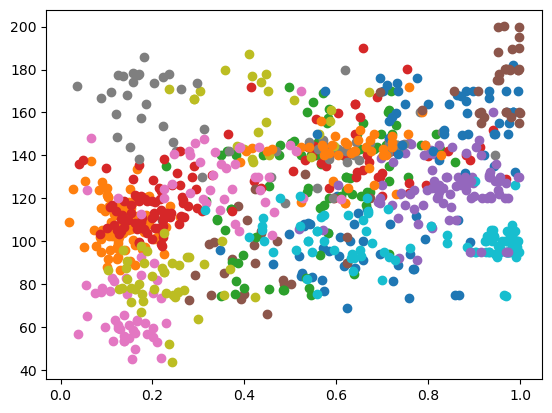

In [10]:
# assign a cluster to each example
labels = kmeans.predict(X_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    plt.scatter(X.to_numpy()[row_ix, 1], X.to_numpy()[row_ix, 3])
    # show the plot
plt.show()

In [11]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0     43
1     90
2     64
3     50
4     48
5     26
6     42
7     34
8     24
9     63
10    47
11    46
12    28
13    77
14    48
15    32
16    42
17    24
18    42
19    42
dtype: int64

In [12]:
X["cluster"] = clusters  #add the cluster column to the DF
X


/var/folders/1x/nk1pmjs57kd0k7pp1vkgtk7w0000gn/T/ipykernel_39107/3293291883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["cluster"] = clusters  #add the cluster column to the DF


,danceability,energy,loudness,tempo,valence,acousticness,cluster
0,0.796,0.865,-6.760,130.012,0.768,0.17900,4
1,0.776,0.714,-5.705,161.015,0.433,0.02830,2
2,0.960,0.670,-7.035,133.966,0.800,0.05980,11
3,0.752,0.571,-6.422,169.155,0.492,0.07230,2
4,0.774,0.700,-7.334,81.990,0.624,0.16300,19
...,...,...,...,...,...,...,...
907,0.720,0.932,-4.204,130.928,0.918,0.09760,4
908,0.667,0.821,-5.565,121.027,0.638,0.09410,14
909,0.704,0.934,-4.528,121.014,0.494,0.02850,14
910,0.716,0.695,-5.250,117.966,0.684,0.00643,14


In [13]:
X[X['cluster'] == 2].sample()

,danceability,energy,loudness,tempo,valence,acousticness,cluster
789,0.799,0.544,-9.732,140.056,0.462,0.11,2


In [14]:
kmeans.inertia_

811.0550743841973

In [15]:
kmeans2 = KMeans(n_clusters=3,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100... default is 10. the larger the better though
                max_iter=1,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(X_scaled_df)
print(kmeans2.inertia_)

2207.9194756657425


Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 



/Users/dominik/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dominik/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dominik/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dominik/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 



/Users/dominik/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dominik/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dominik/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 



/Users/dominik/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dominik/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dominik/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 



/Users/dominik/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dominik/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 



/Users/dominik/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dominik/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 



/Users/dominik/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dominik/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dominik/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



/Users/dominik/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dominik/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

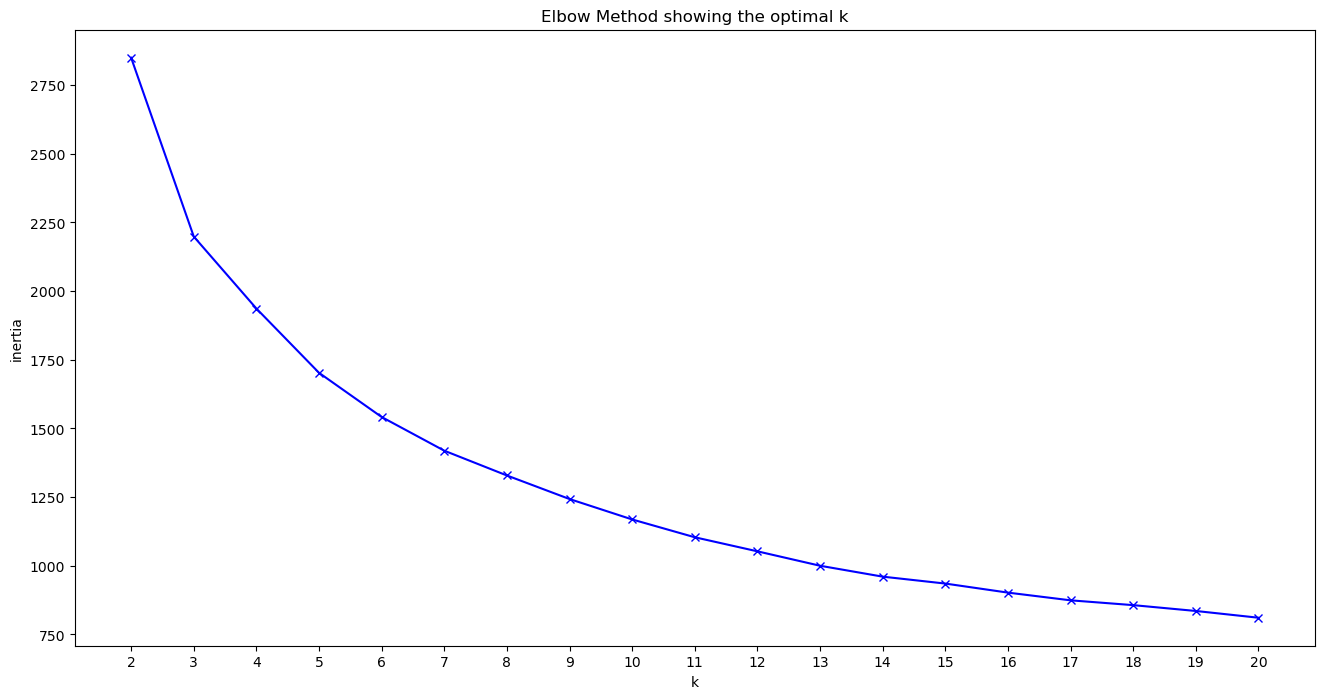

In [16]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

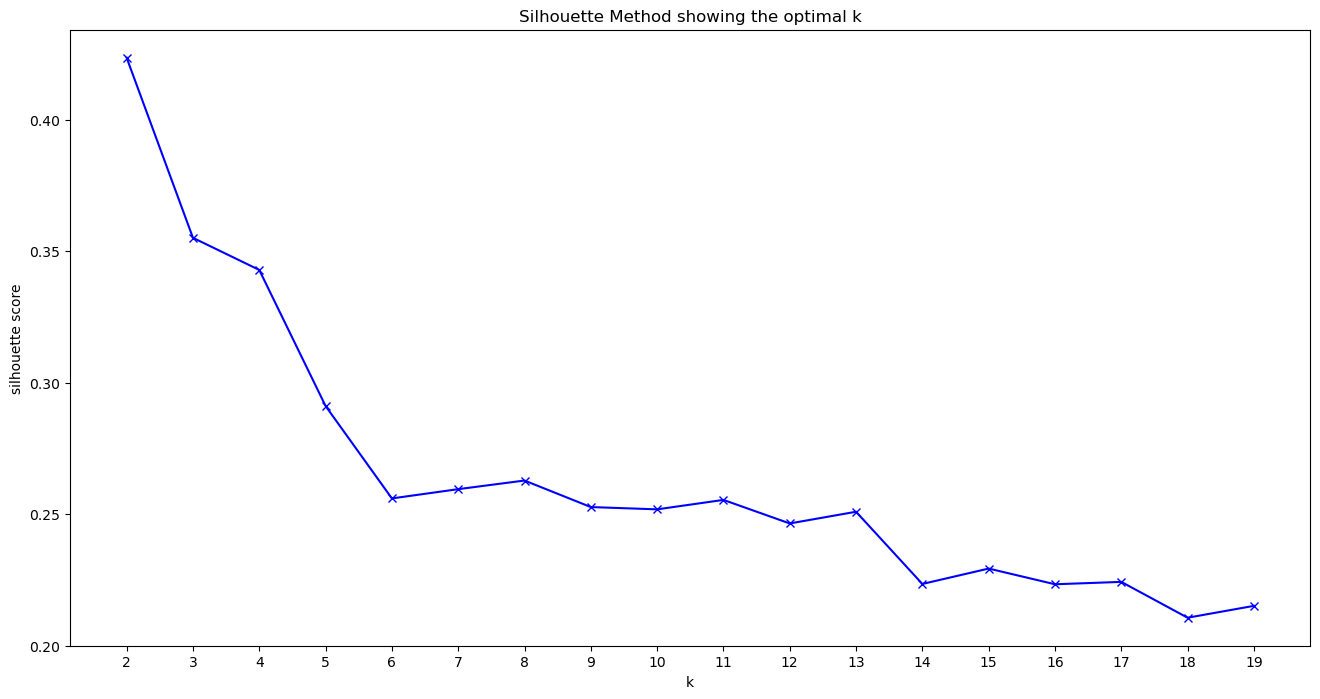

In [17]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234, n_init='auto')
    kmeans.fit(X_scaled_df)
    
    filename = "Model/kmeans_" + str(k) + ".pickle"
    #with open(filename, "wb") as f:
      #  pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

/Users/dominik/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


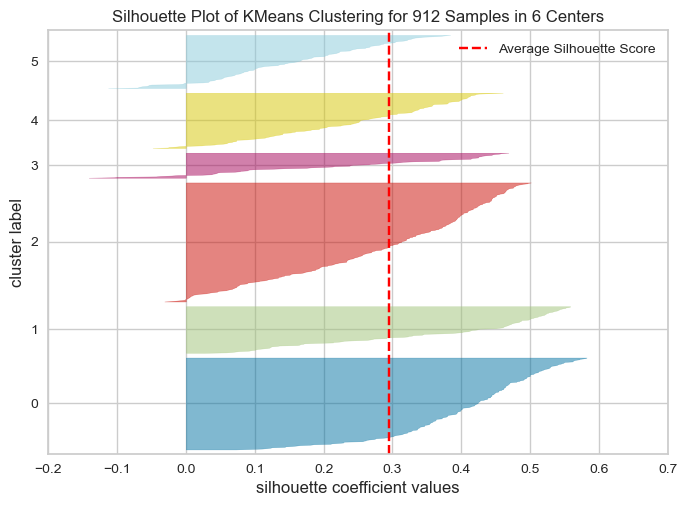

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 912 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [18]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(6, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_scaled_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

#Pickle the Model

In [19]:
import pickle


def save(kmeans, filename = 'spotify_model.pickle'):
    with open(filename, 'wb') as f:
        pickle.dump(kmeans, f)

In [20]:
save(kmeans, filename = "spotify_model.pickle")

In [21]:
def save(scaling, filename = 'scaler.pickle'):
    with open(filename, 'wb') as f:
        pickle.dump(scaling, f)

In [22]:
save(scaling, filename = 'scaler.pickle')

,danceability,energy,loudness,tempo,valence,acousticness,cluster,id
0,0.796,0.865,-6.760,130.012,0.768,0.17900,4,5qQLBOEAelSN7JWqX3RIIv
1,0.776,0.714,-5.705,161.015,0.433,0.02830,2,4rSmXn2TIKt6iBeBDM4uOs
2,0.960,0.670,-7.035,133.966,0.800,0.05980,11,6R5iuYqG0HsnC41RT3lzqX
3,0.752,0.571,-6.422,169.155,0.492,0.07230,2,6FGPpwHlUBnl0TLGKyN4Nl
4,0.774,0.700,-7.334,81.990,0.624,0.16300,19,3ilgxZl5g7MOQCUiky3VOG
...,...,...,...,...,...,...,...,...
907,0.720,0.932,-4.204,130.928,0.918,0.09760,4,4cSSAsYt4afPzyaBdO0WVs
908,0.667,0.821,-5.565,121.027,0.638,0.09410,14,3fGkWWpjU3xghZbKa2rQUW
909,0.704,0.934,-4.528,121.014,0.494,0.02850,14,1JlczCvmw3K2MizmtDvfp3
910,0.716,0.695,-5.250,117.966,0.684,0.00643,14,0oUlljswfmHwdNpjHnn8Ii


In [23]:
X['id']=music_df['id']

/var/folders/1x/nk1pmjs57kd0k7pp1vkgtk7w0000gn/T/ipykernel_39107/618299807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['id']=music_df['id']


In [24]:
X

,danceability,energy,loudness,tempo,valence,acousticness,cluster,id
0,0.796,0.865,-6.760,130.012,0.768,0.17900,4,5qQLBOEAelSN7JWqX3RIIv
1,0.776,0.714,-5.705,161.015,0.433,0.02830,2,4rSmXn2TIKt6iBeBDM4uOs
2,0.960,0.670,-7.035,133.966,0.800,0.05980,11,6R5iuYqG0HsnC41RT3lzqX
3,0.752,0.571,-6.422,169.155,0.492,0.07230,2,6FGPpwHlUBnl0TLGKyN4Nl
4,0.774,0.700,-7.334,81.990,0.624,0.16300,19,3ilgxZl5g7MOQCUiky3VOG
...,...,...,...,...,...,...,...,...
907,0.720,0.932,-4.204,130.928,0.918,0.09760,4,4cSSAsYt4afPzyaBdO0WVs
908,0.667,0.821,-5.565,121.027,0.638,0.09410,14,3fGkWWpjU3xghZbKa2rQUW
909,0.704,0.934,-4.528,121.014,0.494,0.02850,14,1JlczCvmw3K2MizmtDvfp3
910,0.716,0.695,-5.250,117.966,0.684,0.00643,14,0oUlljswfmHwdNpjHnn8Ii


In [25]:
X.to_csv('X.csv', index=False)